---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Applied Machine Learning, Module 1:  A simple classification task

### Import required modules and load data file

In [128]:
from RegscorePy import *
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
fruits = pd.read_table('fruit_data_with_colors.txt')

In [100]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [101]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

<AxesSubplot:>

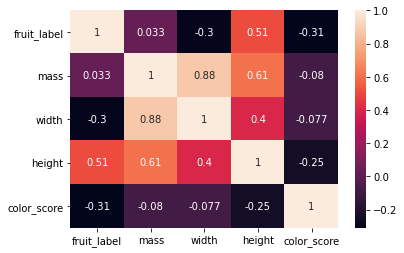

In [102]:
sns.heatmap(fruits.corr(),annot=True)

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Examining the data

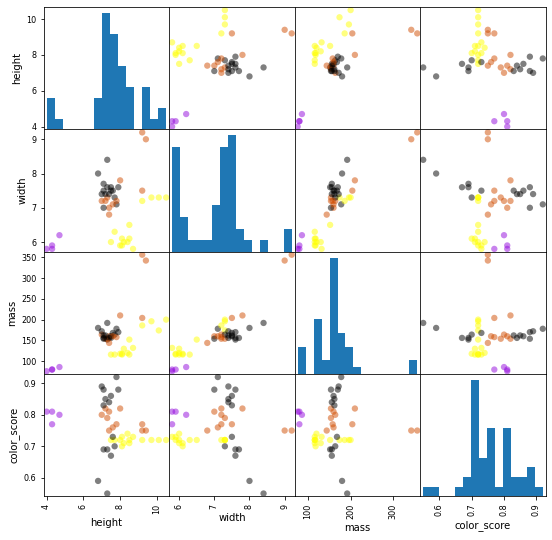

In [103]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

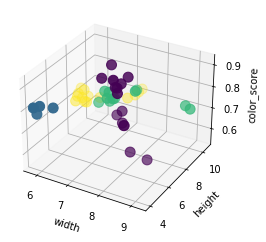

In [104]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create train-test split

In [105]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[[ 'mass','width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create classifier object

In [106]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

In [107]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Estimate the accuracy of the classifier on future data, using the test data

In [108]:
knn.score(X_test, y_test)

0.5333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [109]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[ 20.,4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [110]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[102, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k-NN classifier

In [111]:
%run C:/Users/nikhil/Documents/GitHub/jupyter/jupyter_import.ipynb

In [112]:
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

C:\Users\nikhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:195: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


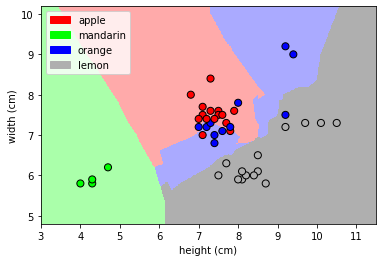

In [113]:

plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

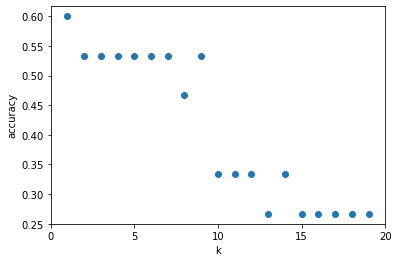

In [114]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### How sensitive is k-NN classification accuracy to the train/test split proportion?

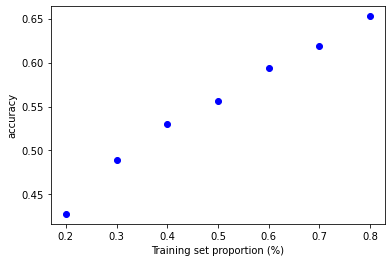

In [115]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 3)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

In [116]:
#imporvement in model 
# 1.  intercorrelation mass and width remove the mass 
# 2.  choose test_size=0.2

In [117]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [118]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [119]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [120]:
knn.score(X_test, y_test)

0.5833333333333334

In [125]:
print(classification_report(y_test,y_pred, target_names=lookup_fruit_name.values()))

              precision    recall  f1-score   support

       apple       0.33      0.25      0.29         4
    mandarin       1.00      1.00      1.00         1
      orange       0.50      0.60      0.55         5
       lemon       1.00      1.00      1.00         2

    accuracy                           0.58        12
   macro avg       0.71      0.71      0.71        12
weighted avg       0.57      0.58      0.57        12



In [129]:
cf_matrix=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

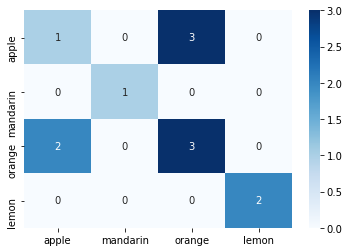

In [130]:
plt.figure()
sns.heatmap(cf_matrix, annot=True,xticklabels=list(lookup_fruit_name.values()),
            yticklabels=list(lookup_fruit_name.values()),
            cmap='Blues')

In [131]:
dict(zip(list(lookup_fruit_name.values()),l2))

{'apple': 3, 'mandarin': 3, 'orange': 4, 'lemon': 3}

In [132]:
%run C:/Users/nikhil/Documents/GitHub/jupyter/jupyter_import.ipynb

C:\Users\nikhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:195: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


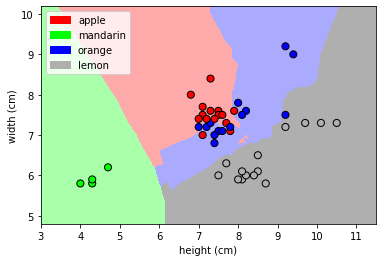

In [133]:


plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

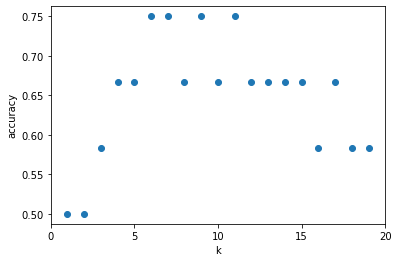

In [134]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

Text(0, 0.5, 'accuracy')

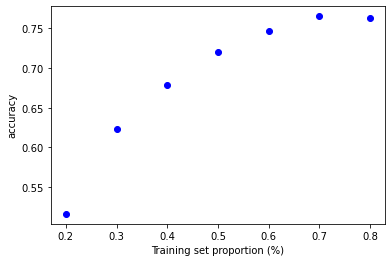

In [135]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 3)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy')

In [136]:
y_ori=[i for i in y_test]

In [137]:
y_pred=knn.predict(X_test)

In [138]:
y = [i for i in  y_test]
y_pred = [i for i in  y_pred]
len(y)

48

In [139]:
len(y_pred)

48

In [142]:
n=len(y_pred)

<a> https://medium.com/analytics-vidhya/probabilistic-model-selection-with-aic-bic-in-python-f8471d6add32 </a>

In [143]:

n*np.log(sum((y_test-y_pred)**2)/n) + 3*np.log(n)

19.86241536520332

In [144]:
from sklearn.metrics import confusion_matrix

In [145]:
cf_matrix_n=confusion_matrix(y_test, y_pred,normalize='true')

In [146]:
cf_matrix=confusion_matrix(y_test, y_pred)

In [147]:
cf_matrix

array([[12,  0,  4,  0],
       [ 0,  0,  4,  0],
       [ 8,  0,  7,  0],
       [ 0,  0,  5,  8]], dtype=int64)

In [148]:
dict(zip(list(lookup_fruit_name.values()),l2))

{'apple': 3, 'mandarin': 3, 'orange': 4, 'lemon': 3}

<AxesSubplot:>

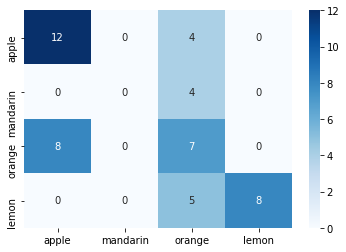

In [149]:
plt.figure()
sns.heatmap(cf_matrix, annot=True,xticklabels=list(lookup_fruit_name.values()),
            yticklabels=list(lookup_fruit_name.values()),
            cmap='Blues')

In [150]:
list(lookup_fruit_name.values())

['apple', 'mandarin', 'orange', 'lemon']

In [151]:

np.sum(cf_matrix)

48

In [152]:
d=dict(y_test.value_counts())

In [153]:
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [154]:
l1=sorted(d.items(), key=lambda x: x[0])

In [155]:
l2=[]
for i in l1:
    l2.append(i[1])

In [156]:
dict(zip(list(lookup_fruit_name.values()),l2))

{'apple': 16, 'mandarin': 4, 'orange': 15, 'lemon': 13}

In [157]:
cf_matrix

array([[12,  0,  4,  0],
       [ 0,  0,  4,  0],
       [ 8,  0,  7,  0],
       [ 0,  0,  5,  8]], dtype=int64)

In [158]:
target_names = ['class 0', 'class 1', 'class 2','nik']
x=classification_report(y_ori,y_pred, target_names=lookup_fruit_name.values(),output_dict=True)

C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
print(classification_report(y_ori,y_pred, target_names=lookup_fruit_name.values()))

              precision    recall  f1-score   support

       apple       0.60      0.75      0.67        16
    mandarin       0.00      0.00      0.00         4
      orange       0.35      0.47      0.40        15
       lemon       1.00      0.62      0.76        13

    accuracy                           0.56        48
   macro avg       0.49      0.46      0.46        48
weighted avg       0.58      0.56      0.55        48



In [160]:
df =round(pd.DataFrame(x).transpose(),2)

In [161]:
df

,precision,recall,f1-score,support
apple,0.60,0.75,0.67,16.00
mandarin,0.00,0.00,0.00,4.00
orange,0.35,0.47,0.40,15.00
lemon,1.00,0.62,0.76,13.00
accuracy,0.56,0.56,0.56,0.56
macro avg,0.49,0.46,0.46,48.00
weighted avg,0.58,0.56,0.55,48.00


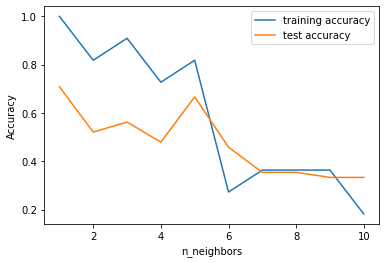

In [189]:

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for i in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

plt.show()

In [190]:
import random

In [191]:
test_size= np.arange(0.1,0.9,0.05)
test_size

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85])

In [195]:
X = fruits[['width', 'height']]
y = fruits['fruit_label']

In [1]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
test_size= np.arange(0.1, 0.9,0.05)
for i in test_size:
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=i,random_state=6)
        clf = KNeighborsClassifier(n_neighbors=5)
        clf.fit(X_train, y_train)
        training_accuracy.append(clf.score(X_train,y_train))
        # record generalization accuracy
        test_accuracy.append(clf.score(X_test,y_test))
        
plt.plot(test_size,training_accuracy,label="training accuracy")
plt.plot(test_size,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("test_size")
plt.legend()

plt.show()

NameError: name 'np' is not defined

In [ ]:
bic(y_test, y_pred, 3)

In [198]:
from sklearn.datasets import load_diabetes 
dt=load_diabetes()

In [199]:
data = pd.DataFrame(data=dt['data'],columns=dt['feature_names'])

In [200]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [201]:
data['target']=dt['target']

In [202]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
